# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [205]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "source_data/city_data.csv"
ride_data_to_load = "source_data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [206]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [207]:
#  1. Get the total rides for each city type
total_rides_type = pyber_data_df.groupby("type")["ride_id"].count()
total_rides_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [208]:
# 2. Get the total drivers for each city type
total_drivers_type = city_data_df.groupby("type")["driver_count"].sum()
total_drivers_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [209]:
#  3. Get the total amount of fares for each city type
total_fares_type = pyber_data_df.groupby("type")["fare"].sum()
total_fares_type

type
Rural       4,327.93
Suburban   19,356.33
Urban      39,854.38
Name: fare, dtype: float64

In [210]:
#  4. Get the average fare per ride for each city type. 
average_fare_type = total_fares_type / total_rides_type
average_fare_type

type
Rural                34.62344
Suburban   30.970128000000003
Urban      24.525772307692307
dtype: float64

In [211]:
# 5. Get the average fare per driver for each city type. 
average_fare_driver = total_fares_type / total_drivers_type
average_fare_driver

type
Rural       55.48628205128205
Suburban    39.50271428571429
Urban      16.571467775467774
dtype: float64

In [212]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.concat([total_rides_type, total_drivers_type, total_fares_type, average_fare_type, average_fare_driver], axis =1)
pyber_summary_df.columns = ['Total Rides', 'Total Drivers', 'Total Fares', 'Average Fare per Ride', 'Average Fare per Driver']
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,"4,327.93",34.62344,55.48628205128205
Suburban,625,490,"19,356.33",30.970128000000003,39.50271428571429
Urban,1625,2405,"39,854.38",24.525772307692307,16.571467775467774


In [213]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"4,327.93",34.62344,55.48628205128205
Suburban,625,490,"19,356.33",30.970128000000003,39.50271428571429
Urban,1625,2405,"39,854.38",24.525772307692307,16.571467775467774


In [214]:
#  8. Format the columns.
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map('{:,d}'.format)
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map('{:,d}'.format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [215]:
# 1. Read the merged DataFram
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [216]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_data_date = pyber_data_df.groupby(['type','date']).sum("fare")
pyber_data_date

fare        ride_id  driver_count
type  date                                                  
Rural 2019-01-01 09:45:36 43.69  2424875833354             1
      2019-01-02 11:18:32 52.12  3454018971635             1
      2019-01-03 19:51:01  19.9  5559509612597             8
      2019-01-04 03:31:26 24.88  4195619112933             8
      2019-01-06 07:38:40 47.33  3849747342021             4
...                         ...            ...           ...
Urban 2019-05-08 04:20:00 21.99   117997692054            52
      2019-05-08 04:39:49 18.45  1811574736337            11
      2019-05-08 07:29:01 18.55  5682021476085            33
      2019-05-08 11:38:35 19.77  7837163332630             4
      2019-05-08 13:10:18 18.04  5616262558026            58

[2375 rows x 3 columns]

In [217]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_data_reset = pyber_data_date.reset_index()
pyber_data_reset


,type,date,fare,ride_id,driver_count
0,Rural,2019-01-01 09:45:36,43.69,2424875833354,1
1,Rural,2019-01-02 11:18:32,52.12,3454018971635,1
2,Rural,2019-01-03 19:51:01,19.9,5559509612597,8
3,Rural,2019-01-04 03:31:26,24.88,4195619112933,8
4,Rural,2019-01-06 07:38:40,47.33,3849747342021,4
...,...,...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99,117997692054,52
2371,Urban,2019-05-08 04:39:49,18.45,1811574736337,11
2372,Urban,2019-05-08 07:29:01,18.55,5682021476085,33
2373,Urban,2019-05-08 11:38:35,19.77,7837163332630,4


In [218]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_data_pivot = pyber_data_reset.pivot("date", "type", "fare")
pyber_data_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [219]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber_data_selection = pyber_data_pivot.loc['2019-01-01':'2019-04-29']
pyber_data_selection


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [220]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pyber_data_selection.index = pd.to_datetime(pyber_data_selection.index)

In [221]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_data_selection.index.inferred_type == "datetime64"

True

In [224]:
pyber_data_selection.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [231]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_data_selection_week = pyber_data_selection.resample("W").sum()
pyber_data_selection_week.round(decimals=2)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.6,"1,661.68"
2019-01-13,67.65,"1,105.13","2,050.43"
2019-01-20,306.0,"1,218.2","1,939.02"
2019-01-27,179.69,"1,203.28","2,129.51"
2019-02-03,333.08,"1,042.79","2,086.94"
2019-02-10,115.8,974.34,"2,162.64"
2019-02-17,95.82,"1,045.5","2,235.07"
2019-02-24,419.06,"1,412.74","2,466.29"
2019-03-03,175.14,858.46,"2,218.2"


C:\Users\Will\Desktop\Analysis\PyBer_Analysis/analysis/Pyber_fare_summary.png


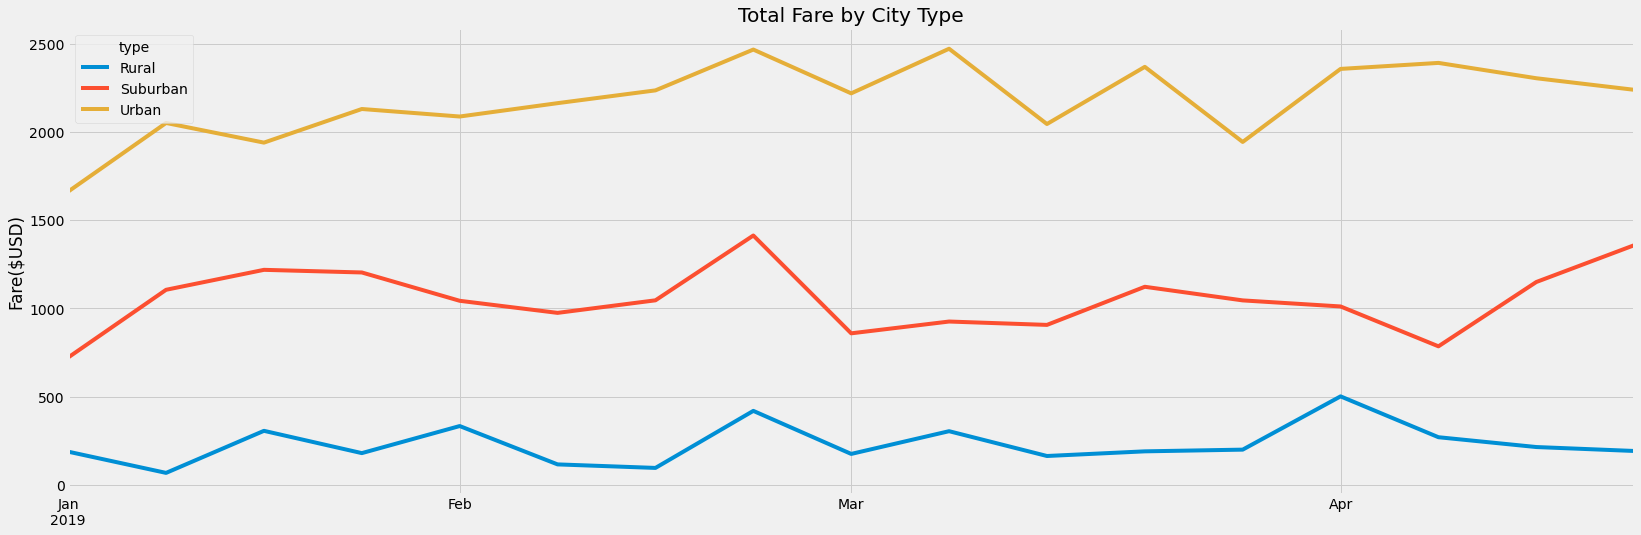

In [250]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
ax= pyber_data_selection_week.plot(title='Total Fare by City Type', figsize=(25, 8))
ax.set_ylabel("Fare($USD)")
ax.set_xlabel("")
# Import the style from Matplotlib.
from matplotlib import style
import os

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
fig = ax.get_figure()

save_path = os.path.dirname(os.getcwd()) + '/analysis/Pyber_fare_summary.png'
fig.savefig(save_path)







